# Stroke Prediction Model

##### Imports

In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# save model
import pickle

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load and split data

In [2]:
stroke_df = pd.read_csv('../data/ml_data/stroke_data.csv')

print(stroke_df.shape)
stroke_df.head()

(40910, 11)


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [3]:
stroke_df["stroke"].value_counts()

stroke
1    20460
0    20450
Name: count, dtype: int64

In [4]:
features = ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

In [5]:
X = stroke_df.loc[:, features]
y = stroke_df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((32728, 9), (8182, 9))

### Classification Function

In [6]:
# Function for Classification
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

## Logistic Regression

TRAIN METRICS
    Confusion Matrix: 
    [[12629  3799]
 [ 6698  9602]]
    
    AUC: 0.7414324003160846

    Classification Report:
                  precision    recall  f1-score   support

           0       0.65      0.77      0.71     16428
           1       0.72      0.59      0.65     16300

    accuracy                           0.68     32728
   macro avg       0.68      0.68      0.68     32728
weighted avg       0.68      0.68      0.68     32728

    
TEST METRICS
    Confusion Matrix: 
    [[3077  945]
 [1739 2421]]
    
    AUC: 0.7305760624258884

    Classification Report:
                  precision    recall  f1-score   support

           0       0.64      0.77      0.70      4022
           1       0.72      0.58      0.64      4160

    accuracy                           0.67      8182
   macro avg       0.68      0.67      0.67      8182
weighted avg       0.68      0.67      0.67      8182

    


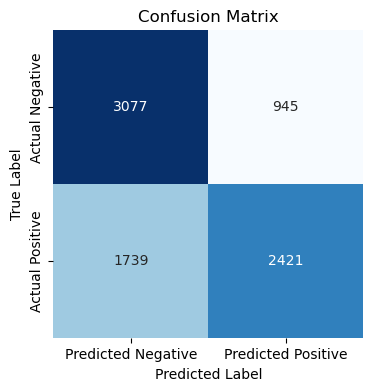

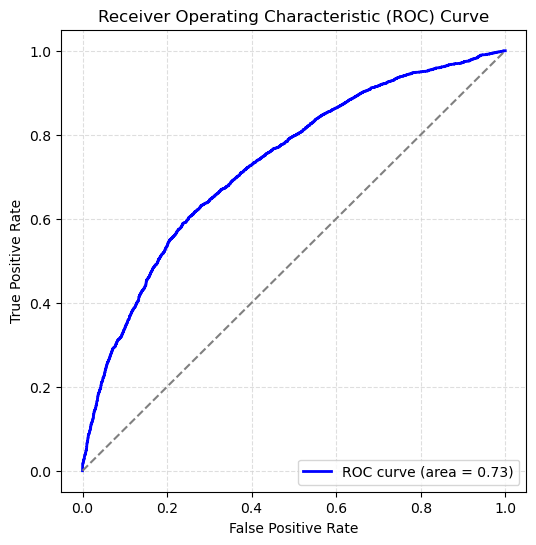

In [7]:
lr = LogisticRegression(random_state=42)
doClassification(lr, X_train, X_test, y_train, y_test)

Logistic Regression is not the best model.

## Decision Tree

TRAIN METRICS
    Confusion Matrix: 
    [[16428     0]
 [    0 16300]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     16428
           1       1.00      1.00      1.00     16300

    accuracy                           1.00     32728
   macro avg       1.00      1.00      1.00     32728
weighted avg       1.00      1.00      1.00     32728

    
TEST METRICS
    Confusion Matrix: 
    [[4021    1]
 [   0 4160]]
    
    AUC: 0.9998756837394331

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      4022
           1       1.00      1.00      1.00      4160

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182

    


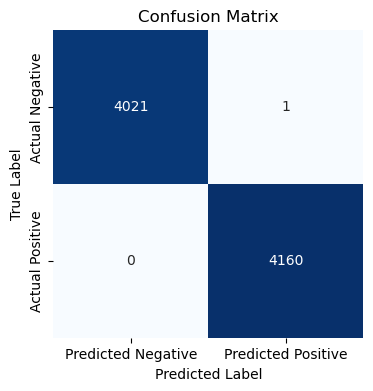

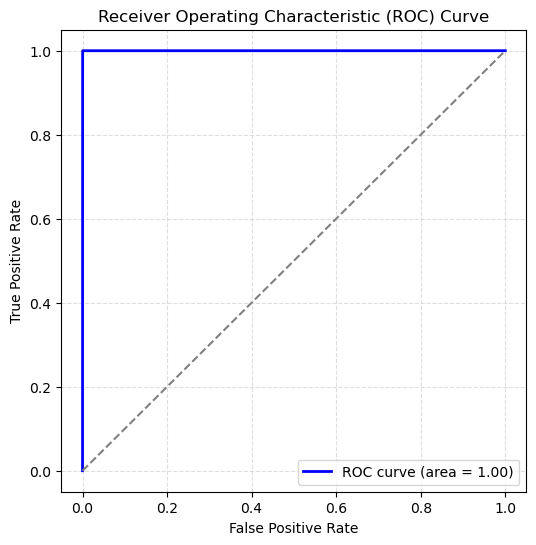

In [8]:
dt = DecisionTreeClassifier(random_state=42)
doClassification(dt, X_train, X_test, y_train, y_test)

Could be a good option, but seems like it might be over-fitting.

## AdaBoost

TRAIN METRICS
    Confusion Matrix: 
    [[12779  3649]
 [ 5764 10536]]
    
    AUC: 0.8081657588196719

    Classification Report:
                  precision    recall  f1-score   support

           0       0.69      0.78      0.73     16428
           1       0.74      0.65      0.69     16300

    accuracy                           0.71     32728
   macro avg       0.72      0.71      0.71     32728
weighted avg       0.72      0.71      0.71     32728

    
TEST METRICS
    Confusion Matrix: 
    [[3089  933]
 [1491 2669]]
    
    AUC: 0.7994909010060055

    Classification Report:
                  precision    recall  f1-score   support

           0       0.67      0.77      0.72      4022
           1       0.74      0.64      0.69      4160

    accuracy                           0.70      8182
   macro avg       0.71      0.70      0.70      8182
weighted avg       0.71      0.70      0.70      8182

    


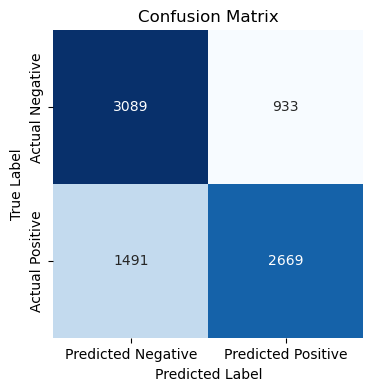

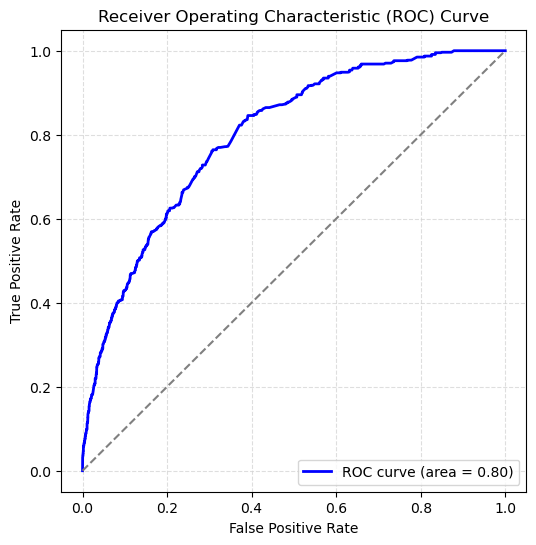

In [9]:
ada = AdaBoostClassifier(random_state=42)
doClassification(ada, X_train, X_test, y_train, y_test)

Not over-fit, but terrible accuracy and too many false negatives.

## Random Forest

TRAIN METRICS
    Confusion Matrix: 
    [[16428     0]
 [    0 16300]]
    
    AUC: 1.0000000000000002

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     16428
           1       1.00      1.00      1.00     16300

    accuracy                           1.00     32728
   macro avg       1.00      1.00      1.00     32728
weighted avg       1.00      1.00      1.00     32728

    
TEST METRICS
    Confusion Matrix: 
    [[4011   11]
 [   0 4160]]
    
    AUC: 0.9999998505814175

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      4022
           1       1.00      1.00      1.00      4160

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182

    


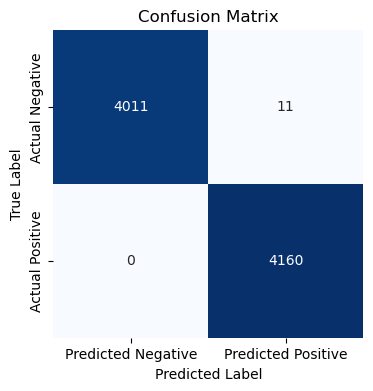

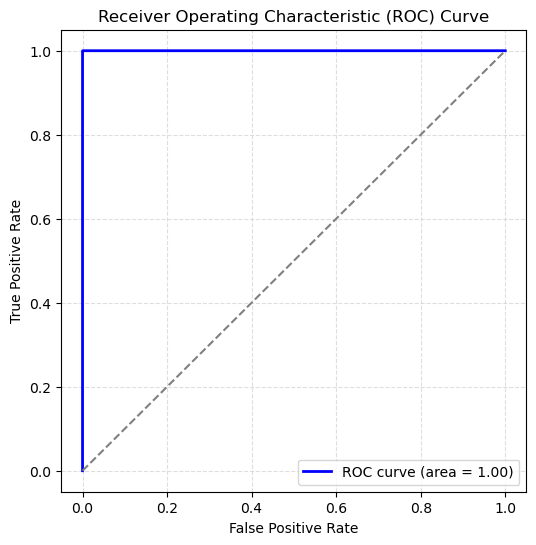

In [10]:
rf = RandomForestClassifier(random_state=42)
doClassification(rf, X_train, X_test, y_train, y_test)

Over-fit.

## LightGBM

[LightGBM] [Info] Number of positive: 16300, number of negative: 16428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 32728, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498044 -> initscore=-0.007822
[LightGBM] [Info] Start training from score -0.007822
TRAIN METRICS
    Confusion Matrix: 
    [[15904   524]
 [    0 16300]]
    
    AUC: 0.9989992321952196

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.97      0.98     16428
           1       0.97      1.00      0.98     16300

    accuracy                           0.98     32728
   macro avg       0.98      0.98      0.98     32728
weighted avg       0.98      0.98  

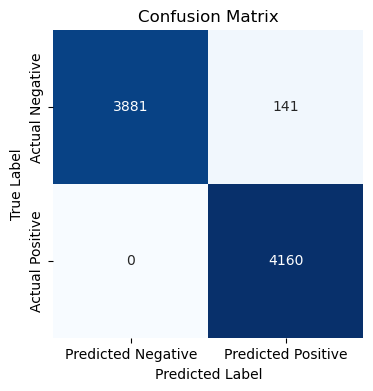

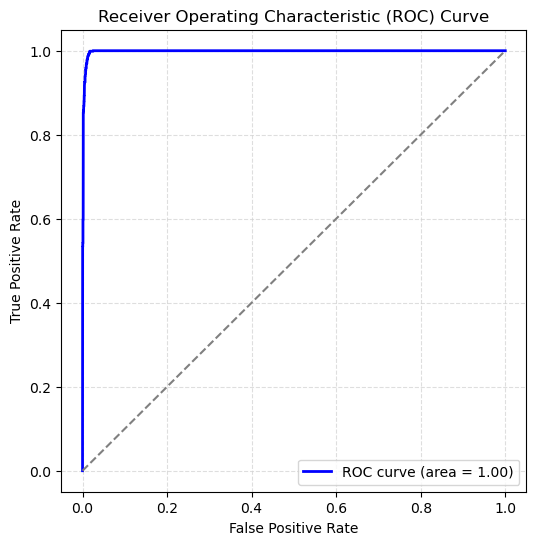

In [11]:
lgbm = LGBMClassifier(random_state=42)
doClassification(lgbm, X_train, X_test, y_train, y_test)

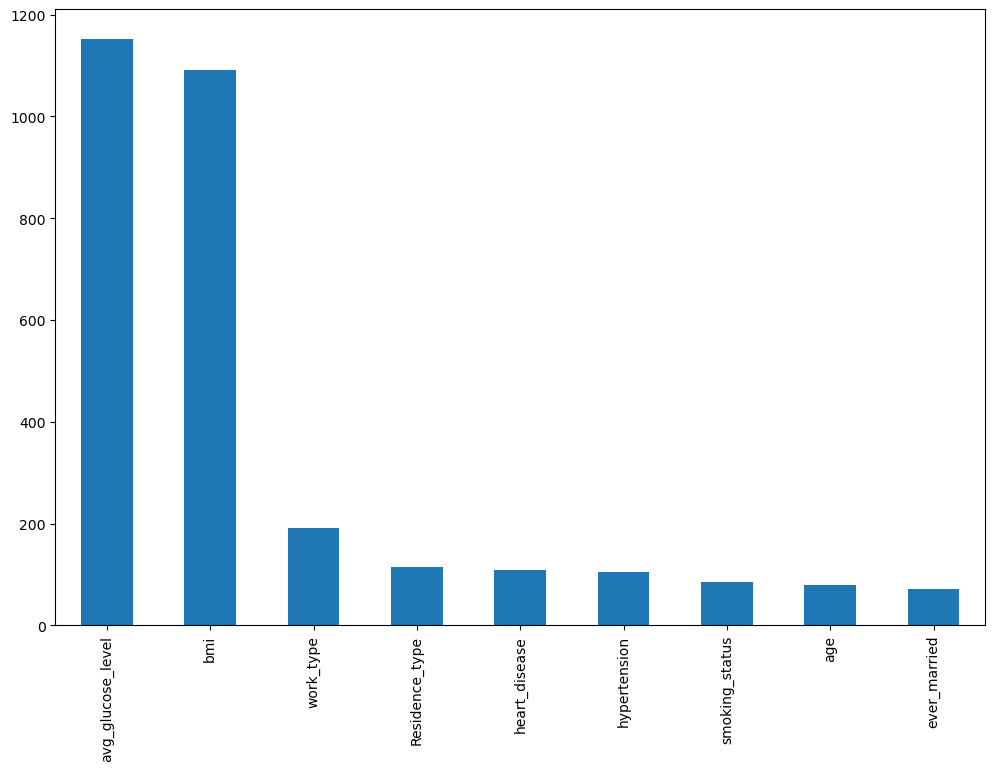

In [12]:
importances = pd.Series(lgbm.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12, 8))
plt.show()

I like this one. It doesn't seem to be over-fit and it's pretty good at avoiding false negatives.

## XGBoost

TRAIN METRICS
    Confusion Matrix: 
    [[16380    48]
 [    0 16300]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     16428
           1       1.00      1.00      1.00     16300

    accuracy                           1.00     32728
   macro avg       1.00      1.00      1.00     32728
weighted avg       1.00      1.00      1.00     32728

    
TEST METRICS
    Confusion Matrix: 
    [[3997   25]
 [   0 4160]]
    
    AUC: 0.9999983862793099

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00      4022
           1       0.99      1.00      1.00      4160

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182

    


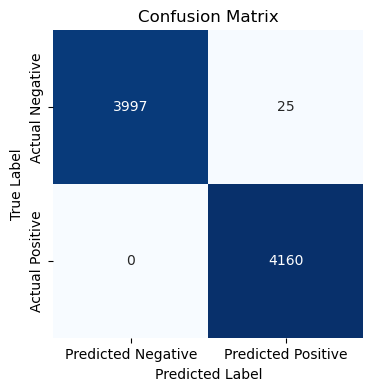

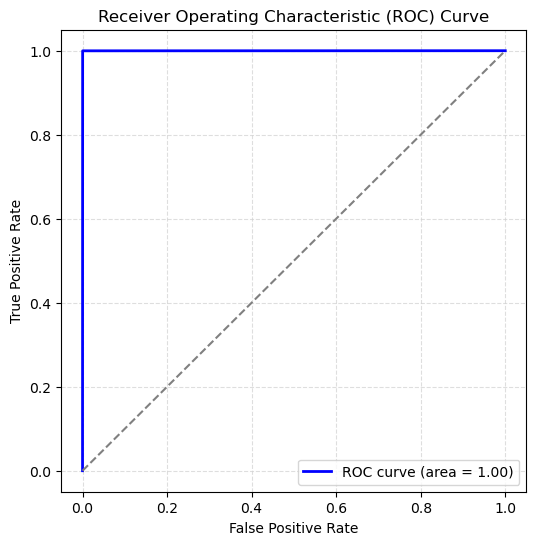

In [13]:
xgb = XGBClassifier(random_state=42)
doClassification(xgb, X_train, X_test, y_train, y_test)

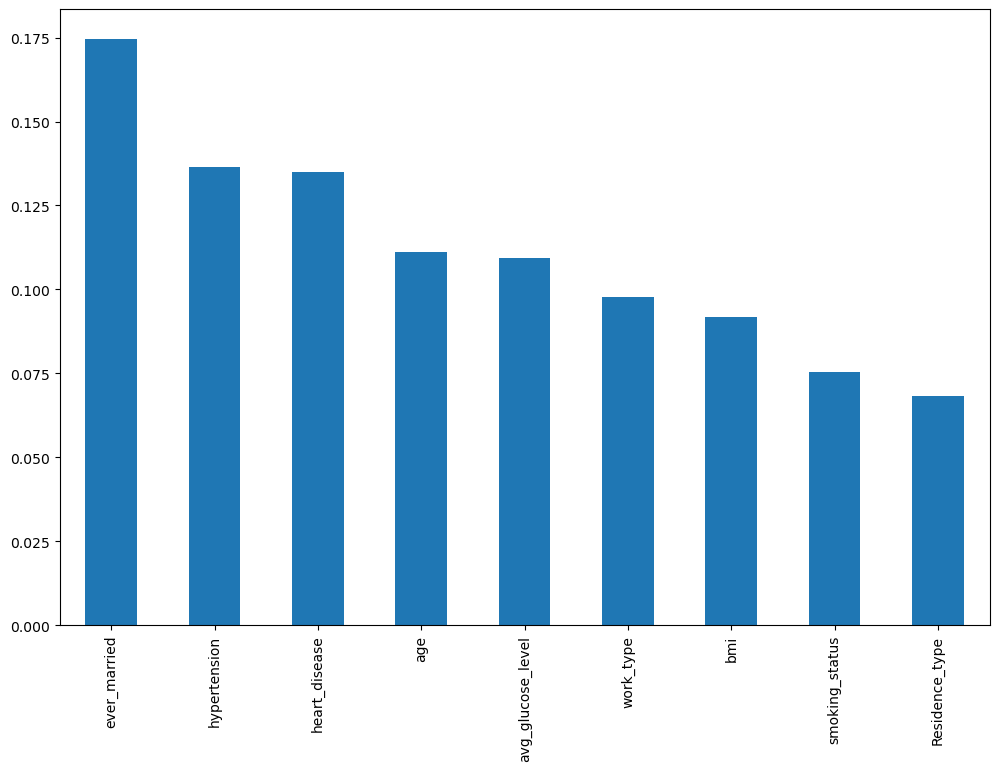

In [14]:
importances = pd.Series(xgb.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12, 8))
plt.show()

This one works pretty well. I like it.

## Extra Trees

TRAIN METRICS
    Confusion Matrix: 
    [[16428     0]
 [    0 16300]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     16428
           1       1.00      1.00      1.00     16300

    accuracy                           1.00     32728
   macro avg       1.00      1.00      1.00     32728
weighted avg       1.00      1.00      1.00     32728

    
TEST METRICS
    Confusion Matrix: 
    [[4018    4]
 [   0 4160]]
    
    AUC: 0.9999993724419539

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      4022
           1       1.00      1.00      1.00      4160

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182

    


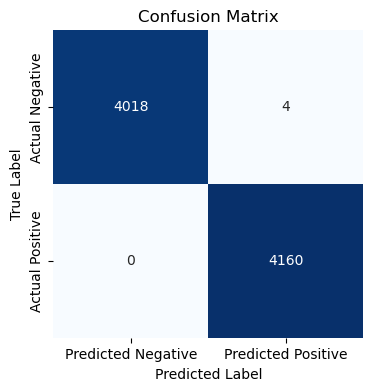

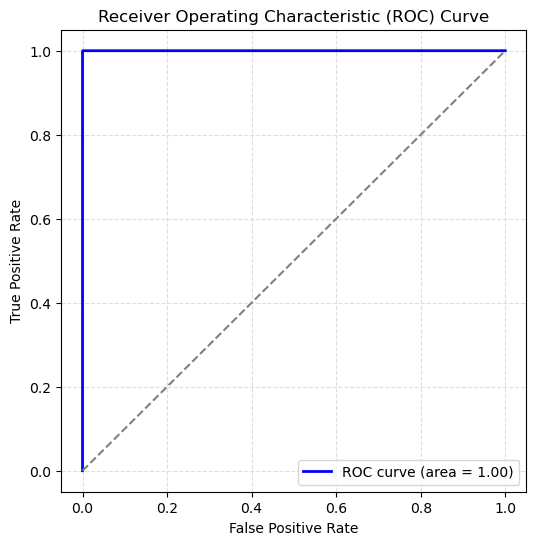

In [15]:
et = ExtraTreesClassifier(random_state=42)
doClassification(et, X_train, X_test, y_train, y_test)

This one is either the best or extremely over-fit.

## Gradient Boost

TRAIN METRICS
    Confusion Matrix: 
    [[13629  2799]
 [ 3274 13026]]
    
    AUC: 0.8981154556562864

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.83      0.82     16428
           1       0.82      0.80      0.81     16300

    accuracy                           0.81     32728
   macro avg       0.81      0.81      0.81     32728
weighted avg       0.81      0.81      0.81     32728

    
TEST METRICS
    Confusion Matrix: 
    [[3282  740]
 [ 840 3320]]
    
    AUC: 0.8895387567895804

    Classification Report:
                  precision    recall  f1-score   support

           0       0.80      0.82      0.81      4022
           1       0.82      0.80      0.81      4160

    accuracy                           0.81      8182
   macro avg       0.81      0.81      0.81      8182
weighted avg       0.81      0.81      0.81      8182

    


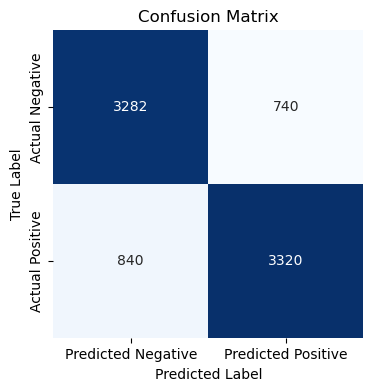

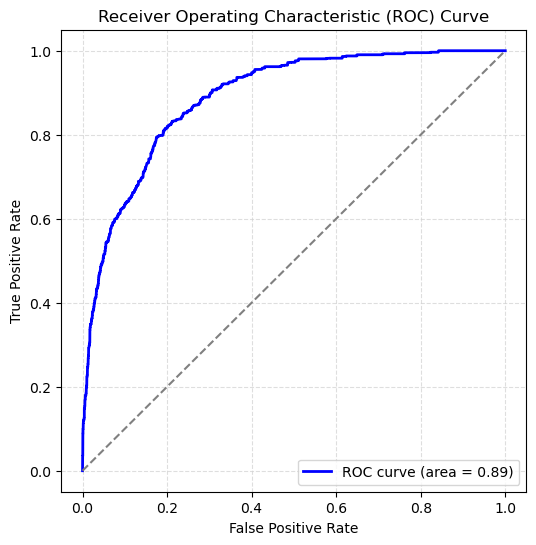

In [16]:
gb = GradientBoostingClassifier(random_state=42)
doClassification(gb, X_train, X_test, y_train, y_test)

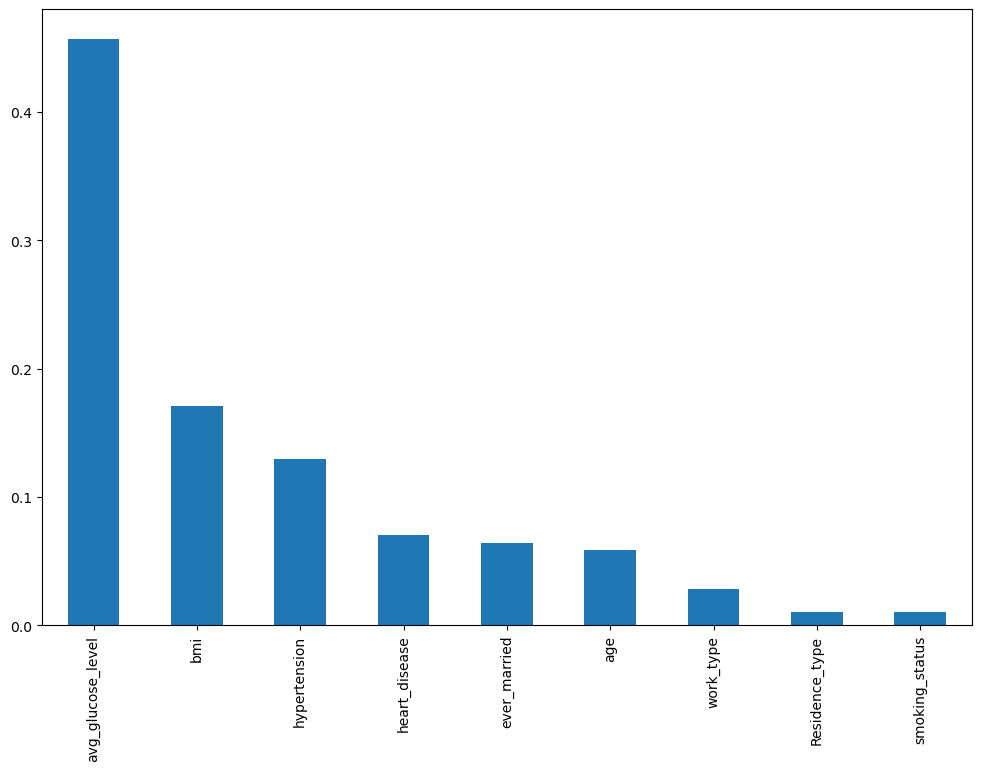

In [17]:
importances = pd.Series(gb.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12, 8))
plt.show()

Not great compared to other models, like LightGBM and XGBoost.

## Save Model

In [18]:
pickle.dump(gb, open('models/stroke_model.h5', 'wb'))